# Titanic Disaster
## by Javier Alonso

## Preliminary Wrangling




In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### GATHERING DATA

>In this section I will gather data from both files available

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

>I concatenate both dataframes for having the complete view

In [4]:
df = pd.concat([train, test], sort=False)

> For checking it has been imported correctly I do some visualization of data

In [5]:
train.shape, test.shape, df.shape

((891, 12), (418, 11), (1309, 12))

> Train and df has one more column because it has de "survived" data, not available in test. In the df dataframe the survived of test data has a NaN

> I´m going to analyze the big dataframe

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
219,220,0.0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.500,NaN,S
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.050,NaN,S
24,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C
19,911,NaN,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.225,NaN,C
551,552,0.0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.000,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## ASESSING AND CLEANING DATA

> After gathering gathering and do the concat of the data, I´ve assessed it visually and programmatically for quality and tidiness issues, and clean the issues

> First thing I do a copy of my dataframe


In [9]:
df_clean = df.copy()

### Incorrect Datatypes

> incorrect datatype of the field: Survived, but as it has NaN values can´t be changed to integer.


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Null Values

> NaN values in Survived, Age (20%), Fare (1 value), Cabin(77% of values) and Embarked (2 values) column. 

> The Survived column doesn´t count as it´s the result variable. We have to see how to fix the other variables

In [11]:
df_clean.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df_clean.isnull().sum()/df_clean.shape[0]

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

> **1- NaN values in Age column**

In [13]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> Solution: there are many options for replacing the null values. Next a few:

> - Replace with the total mean or median of the age
> - Replace with the mean or median of the age of the sex of the passenger
> - Replace with the mean or median of the age of the Pclass of the passenger

> But I think there´s a better option. From the name we can extract the title (Mr, Mrs, Miss,...) and get the mean or the median of the age of the group, so the new age will be more precise

> First I extract the title


In [14]:
#I extract the title
df_clean['Title'] = df_clean.Name.str.split(",", expand = True)[1].str.split(".", expand = True)[0].str.strip()

#I fix the titles asigned incorrectly, leaving only Mr, Miss, Mrs, Master
df_clean.loc[(df_clean.Title == "Dr") & (df_clean.Sex == "male"),"Title"] = "Mr"
df_clean.loc[(df_clean.Title == "Dr") & (df_clean.Sex == "female"),"Title"] = "Mrs"
df_clean.loc[(df_clean.Title == "Dr") & (df_clean.Sex == "female"),"Title"] = "Mrs"
df_clean.loc[(df_clean.Title.isin(["Rev","Col","Major","Jonkheer","Capt","Sir","Don"]) ),"Title"] = "Mr"
df_clean.loc[(df_clean.Title.isin(["Mlle","Mme","Dona","Lady","the Countess","Ms"]) ),"Title"] = "Mrs"

In [15]:
df_clean.Title.value_counts(dropna = False)

Mr        782
Miss      260
Mrs       206
Master     61
Name: Title, dtype: int64

> I get the mean and median for each of the titles

In [16]:
#create a df with the mean and median per title
Title_age = df_clean.groupby('Title').agg({"mean","median" })['Age'].reset_index()

#function for asigning the mean per title to the ages of -1
def mean_age(age, title):
    if age == -1:
        age_mean = round(Title_age[Title_age.Title == title]['mean'].iloc[0],2)
    else:
        age_mean = age
    return age_mean

#I asing -1 to the NaN
df_clean['Age'].fillna(-1, inplace=True)
#I replace the -1 with the mean of the title
df_clean['Age'] = df_clean.apply(lambda x: mean_age(x['Age'],x['Title']),axis=1)

In [17]:
df_clean.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

> **2 NaN in Fare column**. There´s only one value with NaN. The Fare is related to the Pclass, so I´m going to replace the NaN with the mean of its Pclass (3)

In [18]:
class_fare = df_clean.groupby('Pclass').agg({"mean"})['Fare'].reset_index()
class_3_fare = round(class_fare[class_fare['Pclass'] == 3]['mean'].iloc[0],4)
df_clean.Fare.loc[df_clean.PassengerId == 1044] = class_3_fare

C:\Users\Telu Teruno\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
df_clean.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Title             0
dtype: int64

> **3 NaN in Cabin column**. It has with NaN´s 77% of the values of the column, so it´s impossible to get good values for it. I´m going to delete this column as it doesn´t give us quality information

In [20]:
df_clean.isnull().sum()/df_clean.shape[0]

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.774637
Embarked       0.001528
Title          0.000000
dtype: float64

In [21]:
df_clean = df_clean.drop('Cabin', axis=1)

In [22]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


> **4 NaN in Embarked column**. There are only two people with this column in blank. Being a text column I´m going to replace the values with the mode

In [23]:
df_clean[df_clean.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs


In [24]:
df_clean.Embarked.value_counts(dropna = False)

S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

In [25]:
df_clean.Embarked.loc[df_clean.PassengerId.isin(['62','830'])] = df_clean.Embarked.mode().iloc[0]

In [26]:
df_clean.Embarked.value_counts(dropna = False)

S    916
C    270
Q    123
Name: Embarked, dtype: int64

> Now we can see there are only NaNs in the variable to predict

In [27]:
df_clean.isnull().sum()/df_clean.shape[0]

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.000000
Title          0.000000
dtype: float64

### Redundant columns

> There are columns that are not useful for our analysis.

> The Ticket is unique for each passenger, and the valid identifier will be the Passengerid

> The Name is unique for each passenger, and the valid identifier will be the Passengerid

> These two columns are redundant, but we´ll keep the information about each client in a separate dataframe.


In [28]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [37]:
passengers = df_clean.copy()
passengers = passengers.drop(['Survived','Pclass','Sex', 'Age','SibSp','Parch','Fare','Embarked','Title'], axis=1)
df_clean = df_clean.drop(['Name','Ticket'], axis=1)

In [38]:
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,4,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [39]:
passengers.head()

,PassengerId,Name,Ticket
0,1,"Braund, Mr. Owen Harris",A/5 21171
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,5,"Allen, Mr. William Henry",373450


### Consolidation of dataframes

> In this section I´m going to consolidate both dataframes into files, that I´ll read for the next sections

In [41]:
df_clean.to_csv('Titanic_info.csv', index = False)
passengers.to_csv('Titanic_pass_info.csv', index = False)

## Univariate Exploration

> In this section, I´ll investigate the distributions of individual variables in the big dataframe. 

> I won´t investigate the columns of passenger id, as it is just an identifier, and its value in a univariate exploration doesn´t make sense

> First I´ll import the data stored previously in files

In [42]:
df_tit = pd.read_csv('Titanic_info.csv')
df_pass = pd.read_csv('Titanic_pass_info.csv')

In [43]:
df_tit.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,4,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [44]:
df_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Embarked       1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 102.4+ KB


In [45]:
df_pass.head()

,PassengerId,Name,Ticket
0,1,"Braund, Mr. Owen Harris",A/5 21171
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,5,"Allen, Mr. William Henry",373450


In [46]:
df_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
PassengerId    1309 non-null int64
Name           1309 non-null object
Ticket         1309 non-null object
dtypes: int64(1), object(2)
memory usage: 30.8+ KB


### Variable 1: Duration of ride

In [52]:
df_trips.duration_min.describe()

count    4.370704e+06
mean     1.381369e+01
std      3.587473e+01
min      1.000000e+00
25%      5.920000e+00
50%      9.400000e+00
75%      1.468000e+01
max      1.520183e+04
Name: duration_min, dtype: float64

In [53]:
df_trips.duration_min.sort_values()

4220483        1.00
3361756        1.00
3352209        1.00
3348039        1.00
3285151        1.00
             ...   
3129388     1436.95
4249258     1437.17
1305040     1438.02
187716      1439.43
4344997    15201.83
Name: duration_min, Length: 4370704, dtype: float64

> There´s an outlier of 15201.83 minutes (around 10 days) that must be due to an error or incidence

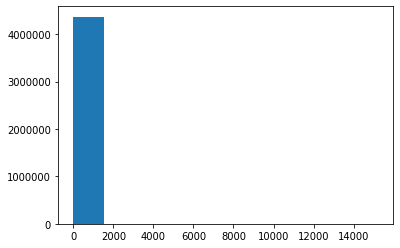

In [54]:
plt.hist(data = df_trips, x = 'duration_min');

> I can see there are some outliers that don´t allow me to see correctly the histogram. I´ll zoom it

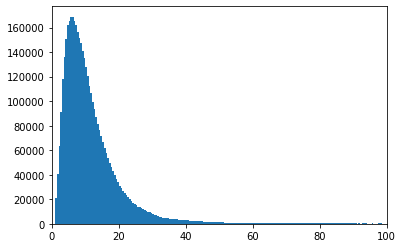

In [55]:
bin_edges = np.arange(0, df_trips['duration_min'].max()+0.5, 0.5)
plt.hist(data = df_trips, x = 'duration_min', bins = bin_edges);
plt.xlim(0, 100);

> The duration of the ride looks like a normal distribution but highly right skewed, that means that we will have to apply the log transformation to it. Most of the rides are of one hour or less

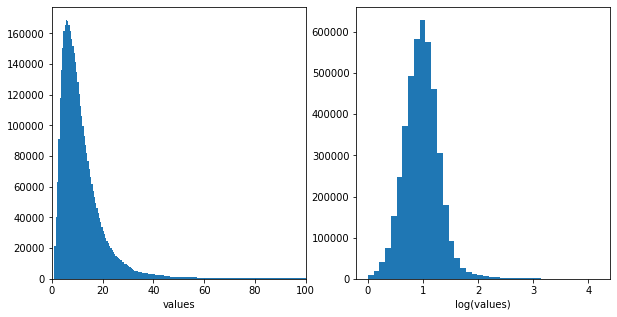

In [56]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df_trips['duration_min'].max()+0.5, 0.5)
plt.hist(data = df_trips, x = 'duration_min', bins = bin_edges);
plt.xlim(0, 100);
plt.xlabel('values')

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(df_trips['duration_min']) # direct data transform
plt.hist(log_data, bins = 40);
plt.xlabel('log(values)');

> The log transformation has worked well and now it looks like more likea normal distribution

### Variable 2: Day of the ride

> I´m going to check just the date, and not the hour, day of the week and month, as these variables are dependent to the date, and just included on the dataframe for the multivariate analysis

In [57]:
df_trips[df_trips.date == 0]

,start_time,start_station_id,end_station_id,bike_id,user_type,duration_min,hour,date,month,day_week


C:\Users\Telu Teruno\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([736695., 736785., 736876., 736968., 737060., 737150., 737241.,
        737333., 737425.]), <a list of 9 Text xticklabel objects>)

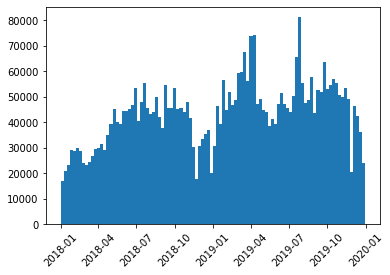

In [58]:
plt.hist(data = df_trips, x = 'date', bins = 100);
plt.xticks(rotation='45')

> The graph is bimodal, number of rides increase in the middle of each year (summer) and decrease a lot at the end and beggining of it (winter). In 2019 there are some peaks of usage

### Variable 3: User Type

In [59]:
df_trips.head()

,start_time,start_station_id,end_station_id,bike_id,user_type,duration_min,hour,date,month,day_week
0,2018-01-31 22:52:35.239,120.0,285.0,2765,Subscriber,1254.73,22,2018-01-31,2018-01-01,3
1,2018-01-31 16:13:34.351,15.0,15.0,2815,Customer,1423.70,16,2018-01-31,2018-01-01,3
2,2018-01-31 14:23:55.889,304.0,296.0,3039,Customer,1192.93,14,2018-01-31,2018-01-01,3
3,2018-01-31 14:53:23.562,75.0,47.0,321,Customer,1017.93,14,2018-01-31,2018-01-01,3
4,2018-01-31 19:52:24.667,74.0,19.0,617,Subscriber,666.10,19,2018-01-31,2018-01-01,3


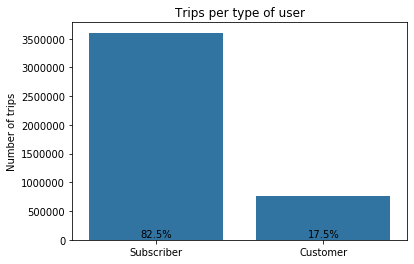

In [75]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df_trips, x = 'user_type', color = base_color);
plt.xlabel('')
plt.ylabel('Number of trips')


# add annotations
n_points = df_trips['user_type'].count()
cat_counts = df_trips['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc,50000,pct_string, ha = 'center', color = 'k')
# plt.xticks(rotation = rot);
plt.title('Trips per type of user');

> More than 80% of the rides are done by subscribers

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my data.

> My objective is try to relate the duration and the number of trips to the month and day of the week

### Duration vs Date

> Let´s see the dependency of the duration of the rides with the date for having a general view of its behaviour, as we are just going to focus on the relationship with month and day of the week

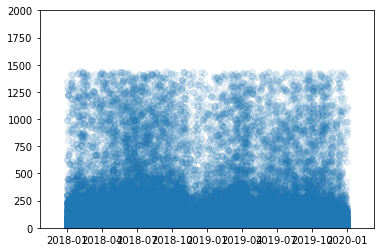

In [76]:
plt.scatter(data = df_trips, x = 'date', y = 'duration_min', alpha = 1/10)
plt.ylim(0, 2000);

> In this scatter plot, due to the huge amount of data is difficult to get conclusions, but we can see there´s not too much correlation between both variables, as it seems the behavior of the duration it´s similar over the two years

### Duration vs Month

> Let´s see the dependency of the duration of the rides with the month of the ride

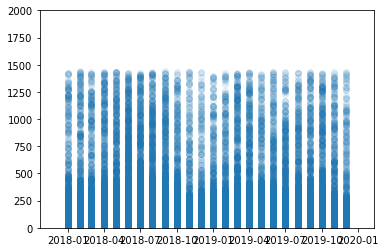

In [87]:
plt.scatter(data = df_trips, x = 'month', y = 'duration_min', alpha = 1/10)
plt.ylim(0, 2000);

> There are differences but it´s not possible to get a pattern. Let´s plot the average duration per month to see what happens

In [88]:
df_trips_avg_dur = df_trips.groupby('month').mean()['duration_min'].to_frame()
df_trips_avg_dur.reset_index(level=0, inplace=True)
df_trips_avg_dur.columns = ['month', 'avg_duration_min']
df_trips_avg_dur

,month,avg_duration_min
0,2018-01-01,14.515603
1,2018-02-01,14.644357
2,2018-03-01,14.510820
3,2018-04-01,14.765474
4,2018-05-01,14.248408
5,2018-06-01,15.129144
6,2018-07-01,15.128504
7,2018-08-01,14.517548
8,2018-09-01,14.668802
9,2018-10-01,13.419798


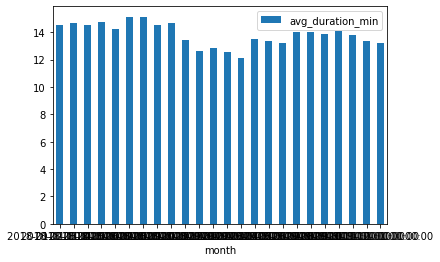

In [89]:
df_trips_avg_dur.plot.bar(x='month', y='avg_duration_min', rot=0)

> The average duration per month vary from 12.1 to 15.13, being the biggest difference 3 minutes. Altough there´s a relationship and the average duration varies per month the difference is not very big, so we can say there´s no importan correspondence between duration and month

### Duration vs Day of the week

> Let´s see the dependency of the duration of the rides with the day of the week of the ride

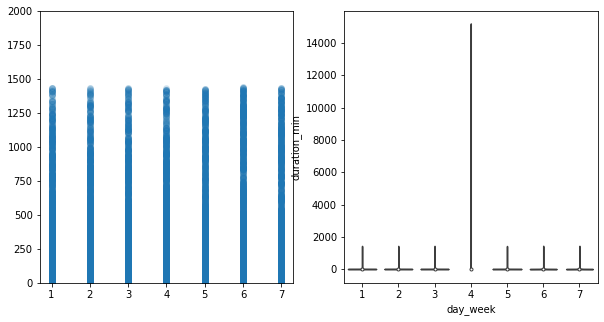

In [103]:
plt.figure(figsize = [10, 5])

# left scatter plot
plt.subplot(1, 2, 1)
plt.scatter(data = df_trips, x = 'day_week', y = 'duration_min', alpha = 1/10)
plt.ylim(0, 2000);

# left violin plots
plt.subplot(1, 2, 2)
sb.violinplot(data = df_trips, x = 'day_week', y = 'duration_min')

> There are differences but it´s not possible to get a pattern in both scatter and violin plots. In violin plots there´s a great difference on thursday but it seems due to outliers or errors

> I´m going to plot the average duration per day of the week and see if we can get something clearer

In [92]:
df_trips_avg_dur_dw = df_trips.groupby('day_week').mean()['duration_min'].to_frame()
df_trips_avg_dur_dw.reset_index(level=0, inplace=True)
df_trips_avg_dur_dw.columns = ['day_week', 'avg_duration_min']
df_trips_avg_dur_dw

,day_week,avg_duration_min
0,1,12.831439
1,2,12.508965
2,3,12.551884
3,4,12.693058
4,5,13.330749
5,6,18.636809
6,7,18.621779


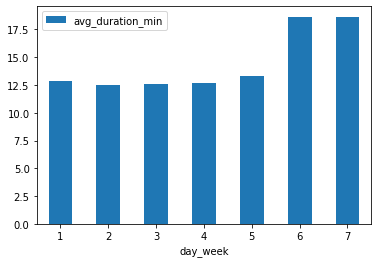

In [93]:
df_trips_avg_dur_dw.plot.bar(x='day_week', y='avg_duration_min', rot=0)

> Here we can see there´s a lot of difference between the average duration during the weekend than the rest of the days of the week, so we keep this relationship for further analysis

### Duration vs Hour

> Let´s see the dependency of the duration of the rides with the the hour that begins the trip

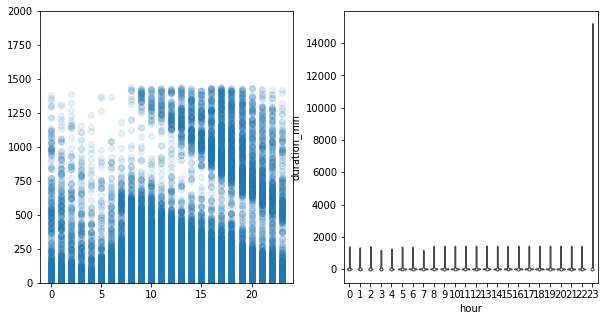

In [77]:
plt.figure(figsize = [10, 5])

# left scatter plot
plt.subplot(1, 2, 1)
plt.scatter(data = df_trips, x = 'hour', y = 'duration_min', alpha = 1/10)
plt.ylim(0, 2000);

# left violin plots
plt.subplot(1, 2, 2)
sb.violinplot(data = df_trips, x = 'hour', y = 'duration_min')

> There are differences but it´s not possible to get a pattern in both scatter and violin plots. 

> I´m going to plot the average duration per day of the week and see if we can get something clearer

In [78]:
df_trips_avg_dur_h = df_trips.groupby('hour').mean()['duration_min'].to_frame()
df_trips_avg_dur_h.reset_index(level=0, inplace=True)
df_trips_avg_dur_h.columns = ['hour', 'avg_duration_min']
df_trips_avg_dur_h

,hour,avg_duration_min
0,0,16.845730
1,1,19.770362
2,2,21.285803
3,3,27.379927
4,4,18.440702
5,5,11.929474
6,6,10.432126
7,7,11.027983
8,8,11.656604
9,9,12.010799


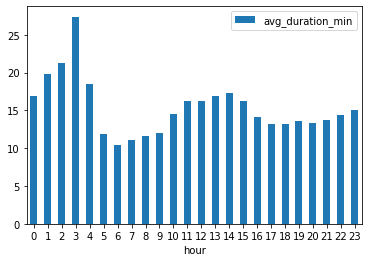

In [80]:
df_trips_avg_dur_h.plot.bar(x='hour', y='avg_duration_min', rot=0)

> There are differences between the different hours, so we keep this relationship for further analysis

### Number of trips vs Month

> Let´s see the dependency of the number of trips with date. We saw on the univariate exploration of the date that the graph is bimodal, number of rides increase in the middle of each year and decrease a lot at the end and beggining of it. In 2019 there are some peaks of usage, but we want to see it better plotting the number of trips against the month

(array([736695., 736785., 736876., 736968., 737060., 737150., 737241.,
        737333., 737425.]), <a list of 9 Text xticklabel objects>)

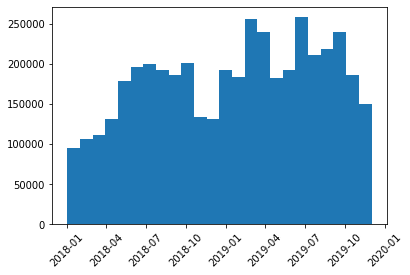

In [96]:
plt.hist(data = df_trips, x = 'month', bins = 24);
plt.xticks(rotation='45');

> This confirms the prior plot with its bimodal behaviour

### Number of trips vs Day of the week

> Let´s see the dependency of the number of trips with the day of the week

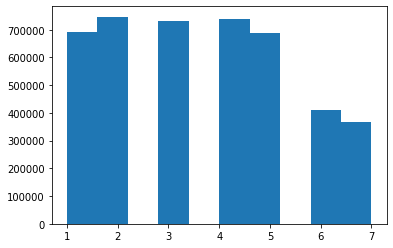

In [98]:
plt.hist(data = df_trips, x = 'day_week');
# plt.xticks(rotation='45')

### Number of trips vs hour

> Let´s see the dependency of the number of trips with the hour when the trip begins

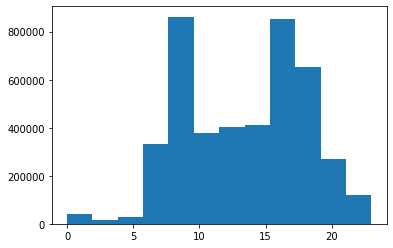

In [82]:
plt.hist(data = df_trips, x = 'hour', bins = 12);
# plt.xticks(rotation='45')

> Clearly the number of trips are much bigger in the early morning (entrance to work) and in the afternoon (coming back home). During night there is little amount of trips

#### Conclussions

> We´ve seen the next correlations:

>- The duration of the trip depends on the day of the week and the hour

>- The number of trips depend on the day of the week, the month and the hour

## Multivariate Exploration

> In this part I´m going to add the variable type of user against the already proved relationships

### Duration vs Weekday vs User

> We´re going to certify that there´s a relationship between duration of the trip, the weekday and the type of user

> As we could see before the information is not clear throuth pure scatter and violin plots, so we´re going to calculate the averages


In [84]:
df_trips.head()

,start_time,start_station_id,end_station_id,bike_id,user_type,duration_min,hour,date,month,day_week
0,2018-01-31 22:52:35.239,120.0,285.0,2765,Subscriber,1254.73,22,2018-01-31,2018-01-01,3
1,2018-01-31 16:13:34.351,15.0,15.0,2815,Customer,1423.70,16,2018-01-31,2018-01-01,3
2,2018-01-31 14:23:55.889,304.0,296.0,3039,Customer,1192.93,14,2018-01-31,2018-01-01,3
3,2018-01-31 14:53:23.562,75.0,47.0,321,Customer,1017.93,14,2018-01-31,2018-01-01,3
4,2018-01-31 19:52:24.667,74.0,19.0,617,Subscriber,666.10,19,2018-01-31,2018-01-01,3


In [111]:
df_trips_subs =  df_trips[df_trips.user_type == 'Subscriber'][['user_type', 'duration_min','day_week']]
df_trips_subs_dur_usr = df_trips_subs.groupby('day_week').mean()['duration_min'].to_frame()
df_trips_subs_dur_usr.reset_index(level=0, inplace=True)
df_trips_subs_dur_usr.columns = ['day_week', 'duration_min']
df_trips_subs_dur_usr

,day_week,duration_min
0,1,10.946195
1,2,10.862461
2,3,10.951323
3,4,10.927581
4,5,11.088346
5,6,12.698212
6,7,12.720300


In [112]:
df_trips_cust =  df_trips[df_trips.user_type == 'Customer'][['user_type', 'duration_min','day_week']]
df_trips_cust_dur_usr = df_trips_cust.groupby('day_week').mean()['duration_min'].to_frame()
df_trips_cust_dur_usr.reset_index(level=0, inplace=True)
df_trips_cust_dur_usr.columns = ['day_week', 'duration_min']
df_trips_cust_dur_usr

,day_week,duration_min
0,1,23.936495
1,2,22.780600
2,3,22.442992
3,4,23.011746
4,5,24.221834
5,6,32.087017
6,7,32.368321


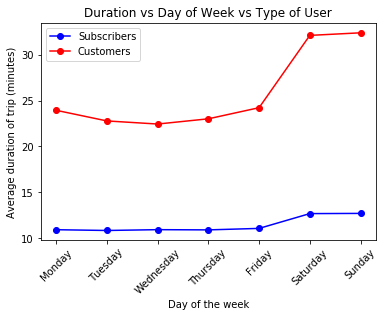

In [113]:
plt.plot(df_trips_subs_dur_usr.day_week, df_trips_subs_dur_usr.duration_min, '-ok', color="blue");
plt.plot(df_trips_cust_dur_usr.day_week, df_trips_cust_dur_usr.duration_min, '-ok', color="red");
plt.legend(['Subscribers','Customers'])
plt.xlabel('Day of the week') 
plt.ylabel('Average duration of trip (minutes)') 
plt.title('Duration vs Day of Week vs Type of User')
positions = (1, 2, 3,4,5,6,7)
labels = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
plt.xticks(positions, labels,rotation = 45);

plt.savefig('01_DurationDWUser.jpg')

> Clearly there´s a difference between both type of users, having higher durations the trips of customers. In both cases the trips are longer during the weekend.

### Duration vs Hour vs User

> We´re going to certify that there´s a relationship between duration of the trip, the hour and the type of user

> As we could see before the information is not clear through pure scatter and violin plots, so we´re going to calculate the averages


In [84]:
df_trips.head()

,start_time,start_station_id,end_station_id,bike_id,user_type,duration_min,hour,date,month,day_week
0,2018-01-31 22:52:35.239,120.0,285.0,2765,Subscriber,1254.73,22,2018-01-31,2018-01-01,3
1,2018-01-31 16:13:34.351,15.0,15.0,2815,Customer,1423.70,16,2018-01-31,2018-01-01,3
2,2018-01-31 14:23:55.889,304.0,296.0,3039,Customer,1192.93,14,2018-01-31,2018-01-01,3
3,2018-01-31 14:53:23.562,75.0,47.0,321,Customer,1017.93,14,2018-01-31,2018-01-01,3
4,2018-01-31 19:52:24.667,74.0,19.0,617,Subscriber,666.10,19,2018-01-31,2018-01-01,3


In [107]:
df_trips_subs =  df_trips[df_trips.user_type == 'Subscriber'][['user_type', 'duration_min','hour']]
df_trips_subs_dur_usr = df_trips_subs.groupby('hour').mean()['duration_min'].to_frame()
df_trips_subs_dur_usr.reset_index(level=0, inplace=True)
df_trips_subs_dur_usr.columns = ['hour', 'duration_min']
df_trips_subs_dur_usr

,hour,duration_min
0,0,11.898859
1,1,14.272890
2,2,14.090449
3,3,16.997330
4,4,13.063330
5,5,10.221891
6,6,9.655453
7,7,10.340650
8,8,10.881810
9,9,10.665879


In [108]:
df_trips_cust =  df_trips[df_trips.user_type == 'Customer'][['user_type', 'duration_min','hour']]
df_trips_cust_dur_usr = df_trips_cust.groupby('hour').mean()['duration_min'].to_frame()
df_trips_cust_dur_usr.reset_index(level=0, inplace=True)
df_trips_cust_dur_usr.columns = ['hour', 'duration_min']
df_trips_cust_dur_usr

,hour,duration_min
0,0,34.468620
1,1,37.631972
2,2,44.030657
3,3,63.028407
4,4,46.846778
5,5,24.712300
6,6,17.281670
7,7,17.006586
8,8,17.740366
9,9,21.416422


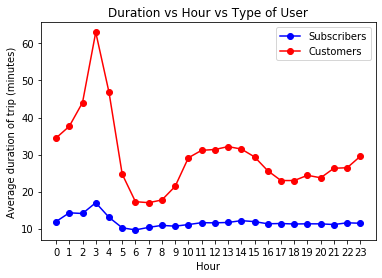

In [109]:
plt.plot(df_trips_subs_dur_usr.hour, df_trips_subs_dur_usr.duration_min, '-ok', color="blue");
plt.plot(df_trips_cust_dur_usr.hour, df_trips_cust_dur_usr.duration_min, '-ok', color="red");
plt.legend(['Subscribers','Customers'])
plt.xlabel('Hour') 
plt.ylabel('Average duration of trip (minutes)') 
plt.title('Duration vs Hour vs Type of User');
plt.xticks(np.arange(24), np.arange(24));

plt.savefig('02_DurationHrUser.jpg')

> The durations of the trips made by customers are longer than subscribers.

> The values from night can´t be really right analysed as there are not too many and have "strange Values", but during the day the subscribers trip duration is almost constant while the costumers vary, being higher during the sunny hours.

### Number of trips vs Month vs User

> We´re going to certify that there´s a relationship between duration of the trip, the month and the type of user

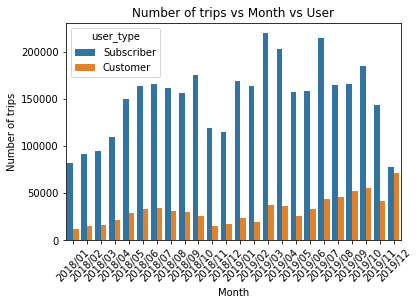

In [114]:
df_trips.month = pd.to_datetime(df_trips.month, format='%Y/%m')
df_trips.month = df_trips.month.dt.strftime('%Y/%m')

ax = sb.countplot(data = df_trips, x = 'month', hue = 'user_type')
ax.set_title("Number of trips vs Month vs User");
ax.set_xlabel('Month')
ax.set_ylabel('Number of trips')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

plt.savefig('03_TripsMonthUser.jpg')

> We can see the number of trips is much higher for subscribers than costumers. 

### Number of trips vs Weekday vs User

> We´re going to certify that there´s a relationship between number of trips, the weekday and the type of user


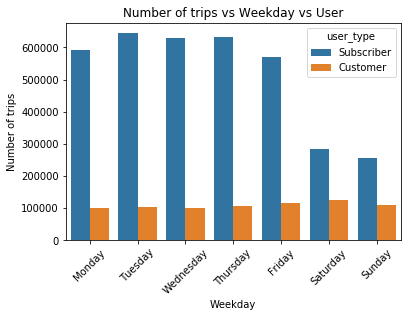

In [115]:
ax = sb.countplot(data = df_trips, x = 'day_week', hue = 'user_type');
ax.set_title("Number of trips vs Weekday vs User");
ax.set_xlabel('Weekday')
ax.set_ylabel('Number of trips');
labels = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
ax.set_xticklabels( labels, rotation=45);

plt.savefig('04_TripsWDUser.jpg')

### Number of trips vs Hour vs User

> We´re going to certify that there´s a relationship between number of trips, the hour and the type of user


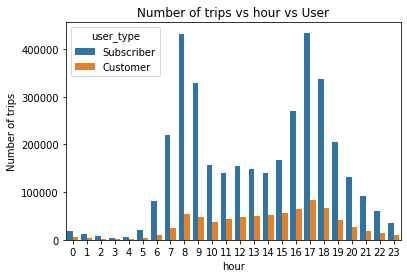

In [117]:
ax = sb.countplot(data = df_trips, x = 'hour', hue = 'user_type');
ax.set_title("Number of trips vs hour vs User");
ax.set_xlabel('hour')
ax.set_ylabel('Number of trips');

plt.savefig('05_TripsHRUser.jpg')

> We can see the number of trips is much higher for subscribers than costumers. In general there are for both type of users more trips during the early morning (time to go to work) and afternoon (time to go back home). The difference to the rest of hours (except at night that is almost null) is bigger for subscribers than costumers

### Final Conclussions

> There are two types of users, subscribers and customers. Subscribers are recurrent users that use the bike on a daily basis, most of them San Francisco citizens, and customers are sporadic users, most of them tourists. Both type of users behave differently using the bikesharing system.

> The duration of the tourists trips are much longer than the ones of the citizens because they use the bike for tourism and for travelling around the city, while the subscribers use it for going to one place to other directly, and during the non weekend days the majority of the trips are from home to job or viceversa. In both cases the duration of the the trips are quite longer during weekends.

> The duration of trips depending on the hour is quite constant for the subscribers, as their trips are usually between near places of the city all along the day. On the other hand, in the case of customers the duration is higher during the sunny hours of the day as they use it for visiting different places of the city and don´t release the bikes on the station. During night in both cases there´s a peak around 3 in the morning due to the closing time of bars and discos and they come back to hotel or home. 

> The number of trips taken by subscribers and costumers vary a lot, beeing much higher the trips of the citizens along the year. The number of trips for customers is almost constant during the seven years of the week because the number of tourists don´t vary too much between days. On the other hand the trips of subscribers descend a lot during weekends because most of the trips out of the weekend are due to the transport between job and home and viceversa

> During the two years per month the subscribers trips are always higher than the costumers but both behave in a similar way, being greater in the middle months of the year and being lower in winter, except from last month analyzed, December 2019, were both have similar number of trips due to a high descend in citizens trips and a high uprise in tourist trips. Probably there´s a reason for this abnomal behaviour.

> Looking at the hour of the trip, the peak hours are at the time going to work (7-8AM) and coming back (17-18h)